<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Audio-ML/blob/main/Notebooks/Audio_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# implementing a neural network for music genre classification : Solving overfitting

## 0. Prerequirities

In [ ]:
# Importing
import tensorflow as tf
import numpy as np
import json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# path to json file that stores MFCCs and genre labels for each processed segment
DATASET_PATH = "/content/dataset/Data"
JSON_PATH = "/content/data_10.json"

In [ ]:
# Downloading json file to our local colab notebook
from google.colab import drive
drive.mount('/content/drive')
%cp '/content/drive/My Drive/data_10.json' '/content/'

Mounted at /content/drive


In [ ]:
def load_data(json_path = JSON_PATH) :
  """
  Loading training data from json file

  :param data_path (str) : Path to json file containing data
  :return X (ndarray) : Inputs
  :return y (ndarray) : Targets

  """
  with open(json_path , "r") as fp :
    data = json.load(fp)

  X = np.array(data["mfcc"])
  y = np.array(data["lables"])

  # Data successfully loaded
  return X , y


In [ ]:
def plot_history(history) :
  """
  Plots accuracy/loss for training/validation set as a function of the epochs

  :param
  """
  #
  plt.subplot(2,2,1)
  plt.plot(history.history["accuracy"] , label = "train_acc")
  plt.plot(history.history["val_accuracy"] , label = "test_acc")
  plt.legend()
  plt.title("Accuracy")

  #
  plt.subplot(2,2,2)
  plt.plot(history.history["loss"] , label = "train error")
  plt.plot(history.history["val_loss"] , label = "test error")
  plt.legend()
  plt.title("Error")

In [ ]:
if __name__ == "__main__" :
  # load data
  X, y = load_data(JSON_PATH)

  # spliting to train and test
  X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3)

  # build model
  model_1 = tf.keras.Sequential([

      tf.keras.layers.Flatten(input_shape = (X.shape[1] , X.shape[2])),
      tf.keras.layers.Dense(512 , activation = "relu") ,
      tf.keras.layers.Dense(256 , activation = "relu") ,
      tf.keras.layers.Dense(64 , activation = "relu") ,
      tf.keras.layers.Dense(10 , activation = "softmax")

  ])

  model_2 = tf.keras.Sequential([

      tf.keras.layers.Flatten(input_shape = (X.shape[1] , X.shape[2])),
      tf.keras.layers.Dropout(0.3) ,
      tf.keras.layers.Dense(512 , activation = "relu") ,
      tf.keras.layers.Dropout(0.3) ,
      tf.keras.layers.Dense(256 , activation = "relu") ,
      tf.keras.layers.Dropout(0.3) ,
      tf.keras.layers.Dense(64 , activation = "relu") ,
      tf.keras.layers.Dense(10 , activation = "softmax")

  ])
  # compile model
  model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001) ,
                loss = 'sparse_categorical_crossentropy' ,
                metrics = ["accuracy"])

  model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001) ,
                loss = 'sparse_categorical_crossentropy' ,
                metrics = ["accuracy"])


  # checking model details
  # model.summary()

  # train model
  history_1 = model_1.fit(x = X_train ,
                          y = y_train ,
                          validation_data = (X_test , y_test) ,
                          batch_size = 32 ,
                          epochs= 50)
  history_2 = model_2.fit(x = X_train ,
                          y = y_train ,
                          validation_data = (X_test , y_test) ,
                          batch_size = 32 ,
                          epochs= 50)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.2591 - loss: 15.9246 - val_accuracy: 0.3348 - val_loss: 4.0665
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3945 - loss: 3.0562 - val_accuracy: 0.3992 - val_loss: 2.9440
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4830 - loss: 2.0520 - val_accuracy: 0.4049 - val_loss: 2.5762
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5294 - loss: 1.6834 - val_accuracy: 0.4536 - val_loss: 2.3016
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5783 - loss: 1.3903 - val_accuracy: 0.4539 - val_loss: 2.2909
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6254 - loss: 1.2001 - val_accuracy: 0.4449 - val_loss: 2.2465
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6690 - loss: 1.0137 - val_accuracy: 0.4663 - val_loss: 2.2497
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7064 - loss: 0.9126 - val_acc

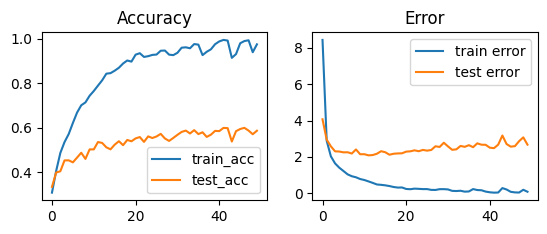

In [ ]:
# plotting overfitted model
plot_history(history_1)

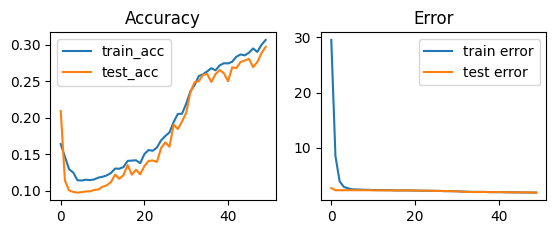

In [ ]:
# plotting problem solved model
plot_history(history_2)